In [7]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

select_power_RE_rapid = pd.read_csv("/Users/liqunp/Desktop/Fig4_Battery_paper/Switch_2020_slow_RE_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
select_power_Ind_rapid = pd.read_csv("/Users/liqunp/Desktop/Fig4_Battery_paper/Switch_2020_slow_Ind_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")
select_power_Demand_rapid = pd.read_csv("/Users/liqunp/Desktop/Fig4_Battery_paper/Switch_2020_slow_Demand_SA5_new/Energy_from_He_Test/outputs/dispatch_zonal_annual_summary.csv")


select_power_RE_rapid = select_power_RE_rapid.loc [select_power_RE_rapid['gen_energy_source'] == 'Coal']
select_power_Ind_rapid = select_power_Ind_rapid.loc [select_power_Ind_rapid['gen_energy_source'] == 'Coal']
select_power_Demand_rapid = select_power_Demand_rapid.loc [select_power_Demand_rapid['gen_energy_source'] == 'Coal']

result_power_RE_rapid = select_power_RE_rapid.groupby([
    pd.Grouper ('gen_load_zone'),
    pd.Grouper ('period')
]).sum()
select_power_RE_rapid = result_power_RE_rapid[['Energy_GWh_typical_yr']]/1000


result_power_Ind_rapid = select_power_Ind_rapid.groupby([
    pd.Grouper ('gen_load_zone'),
    pd.Grouper ('period')
]).sum()
select_power_Ind_rapid = result_power_Ind_rapid[['Energy_GWh_typical_yr']]/1000


result_power_Demand_rapid = select_power_Demand_rapid.groupby([
    pd.Grouper ('gen_load_zone'),
    pd.Grouper ('period')
]).sum()
select_power_Demand_rapid = result_power_Demand_rapid[['Energy_GWh_typical_yr']]/1000


In [9]:
years = [2023, 2028, 2033, 2038, 2043, 2048]
provs = ['Anhui', 'Beijing', 'Chongqing', 'East_Inner_Mongolia', 'Fujian','Gansu', 'Guangdong', 
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei','Heilongjiang', 'Henan', 'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi',
       'Jilin', 'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong','Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'West_Inner_Mongolia','Xinjiang', 'Yunnan', 'Zhejiang']
# new df
filled_power = pd.DataFrame(
    index=pd.MultiIndex.from_product([provs, years], names=('gen_load_zone','period'))
)
filled_power["RE_rapid"] = 0
filled_power["Ind_rapid"] = 0
filled_power["Demand_rapid"] = 0


RE_rapid  Ind_rapid  Demand_rapid
gen_load_zone period                                   
Anhui         2023           0          0             0
              2028           0          0             0
              2033           0          0             0
              2038           0          0             0
              2043           0          0             0
...                        ...        ...           ...
Zhejiang      2028           0          0             0
              2033           0          0             0
              2038           0          0             0
              2043           0          0             0
              2048           0          0             0

[192 rows x 3 columns]

In [10]:
for prov in provs:
    for year in years:
        if select_power_RE_rapid.index.isin([(prov, year)]).any():
            filled_power.loc[(prov, year), "RE_rapid"] = select_power_RE_rapid.loc[(prov, year), "Energy_GWh_typical_yr"]
            filled_power.loc[(prov, year), "Ind_rapid"] = select_power_Ind_rapid.loc[(prov, year), "Energy_GWh_typical_yr"]
            filled_power.loc[(prov, year), "Demand_rapid"] = select_power_Demand_rapid.loc[(prov, year), "Energy_GWh_typical_yr"]

# filled_power.to_csv(r'/Users/liqunp/Desktop/data.csv')


In [6]:
for p in provs:
    
    cat = "RE_rapid"
    province_RE = filled_power[cat]
    
    cat = "Ind_rapid"
    province_Ind = filled_power[cat]
    cat = "Demand_rapid"
    province_Demand = filled_power[cat]

    province_RE = province_RE[p]  
    province_Ind = province_Ind[p]
    province_Demand = province_Demand[p]


    fig = plt.figure(figsize=(3, 4), dpi=600)


    r = range (6)
    year = [2025,2030,2035,2040,2045,2050]
    x= range (6)
    y1 = province_RE
    y2 = province_Ind
    y3 = province_Demand

    plt.scatter (x,y1, label = 'RE+battery',  marker='o', s = 50, color='lightgreen',edgecolor='black')
    plt.xticks(r, year, fontweight='bold',fontname = 'Arial', size =9)
    plt.ylim(0,250)
    plt.yticks(fontsize=10,color = 'black')
    plt.ylabel('Charged power for batteries (TWh)', size = 10, fontname = 'Arial') 
#     plt.ylabel('Coal-fired power generation (TWh)', size = 10, fontname = 'Arial') 
    plt.scatter (x,y2, label = 'No constraint', marker='^', s = 50, color='orange',edgecolor='black')
    plt.scatter (x,y3, label = 'Demand side', marker='d', s = 50, color='blue',edgecolor='black')

    plt.title(p, fontname = 'Arial', size =10)
    plt.legend(loc="upper right", frameon=False, fontsize = 10)
    plt.close()  

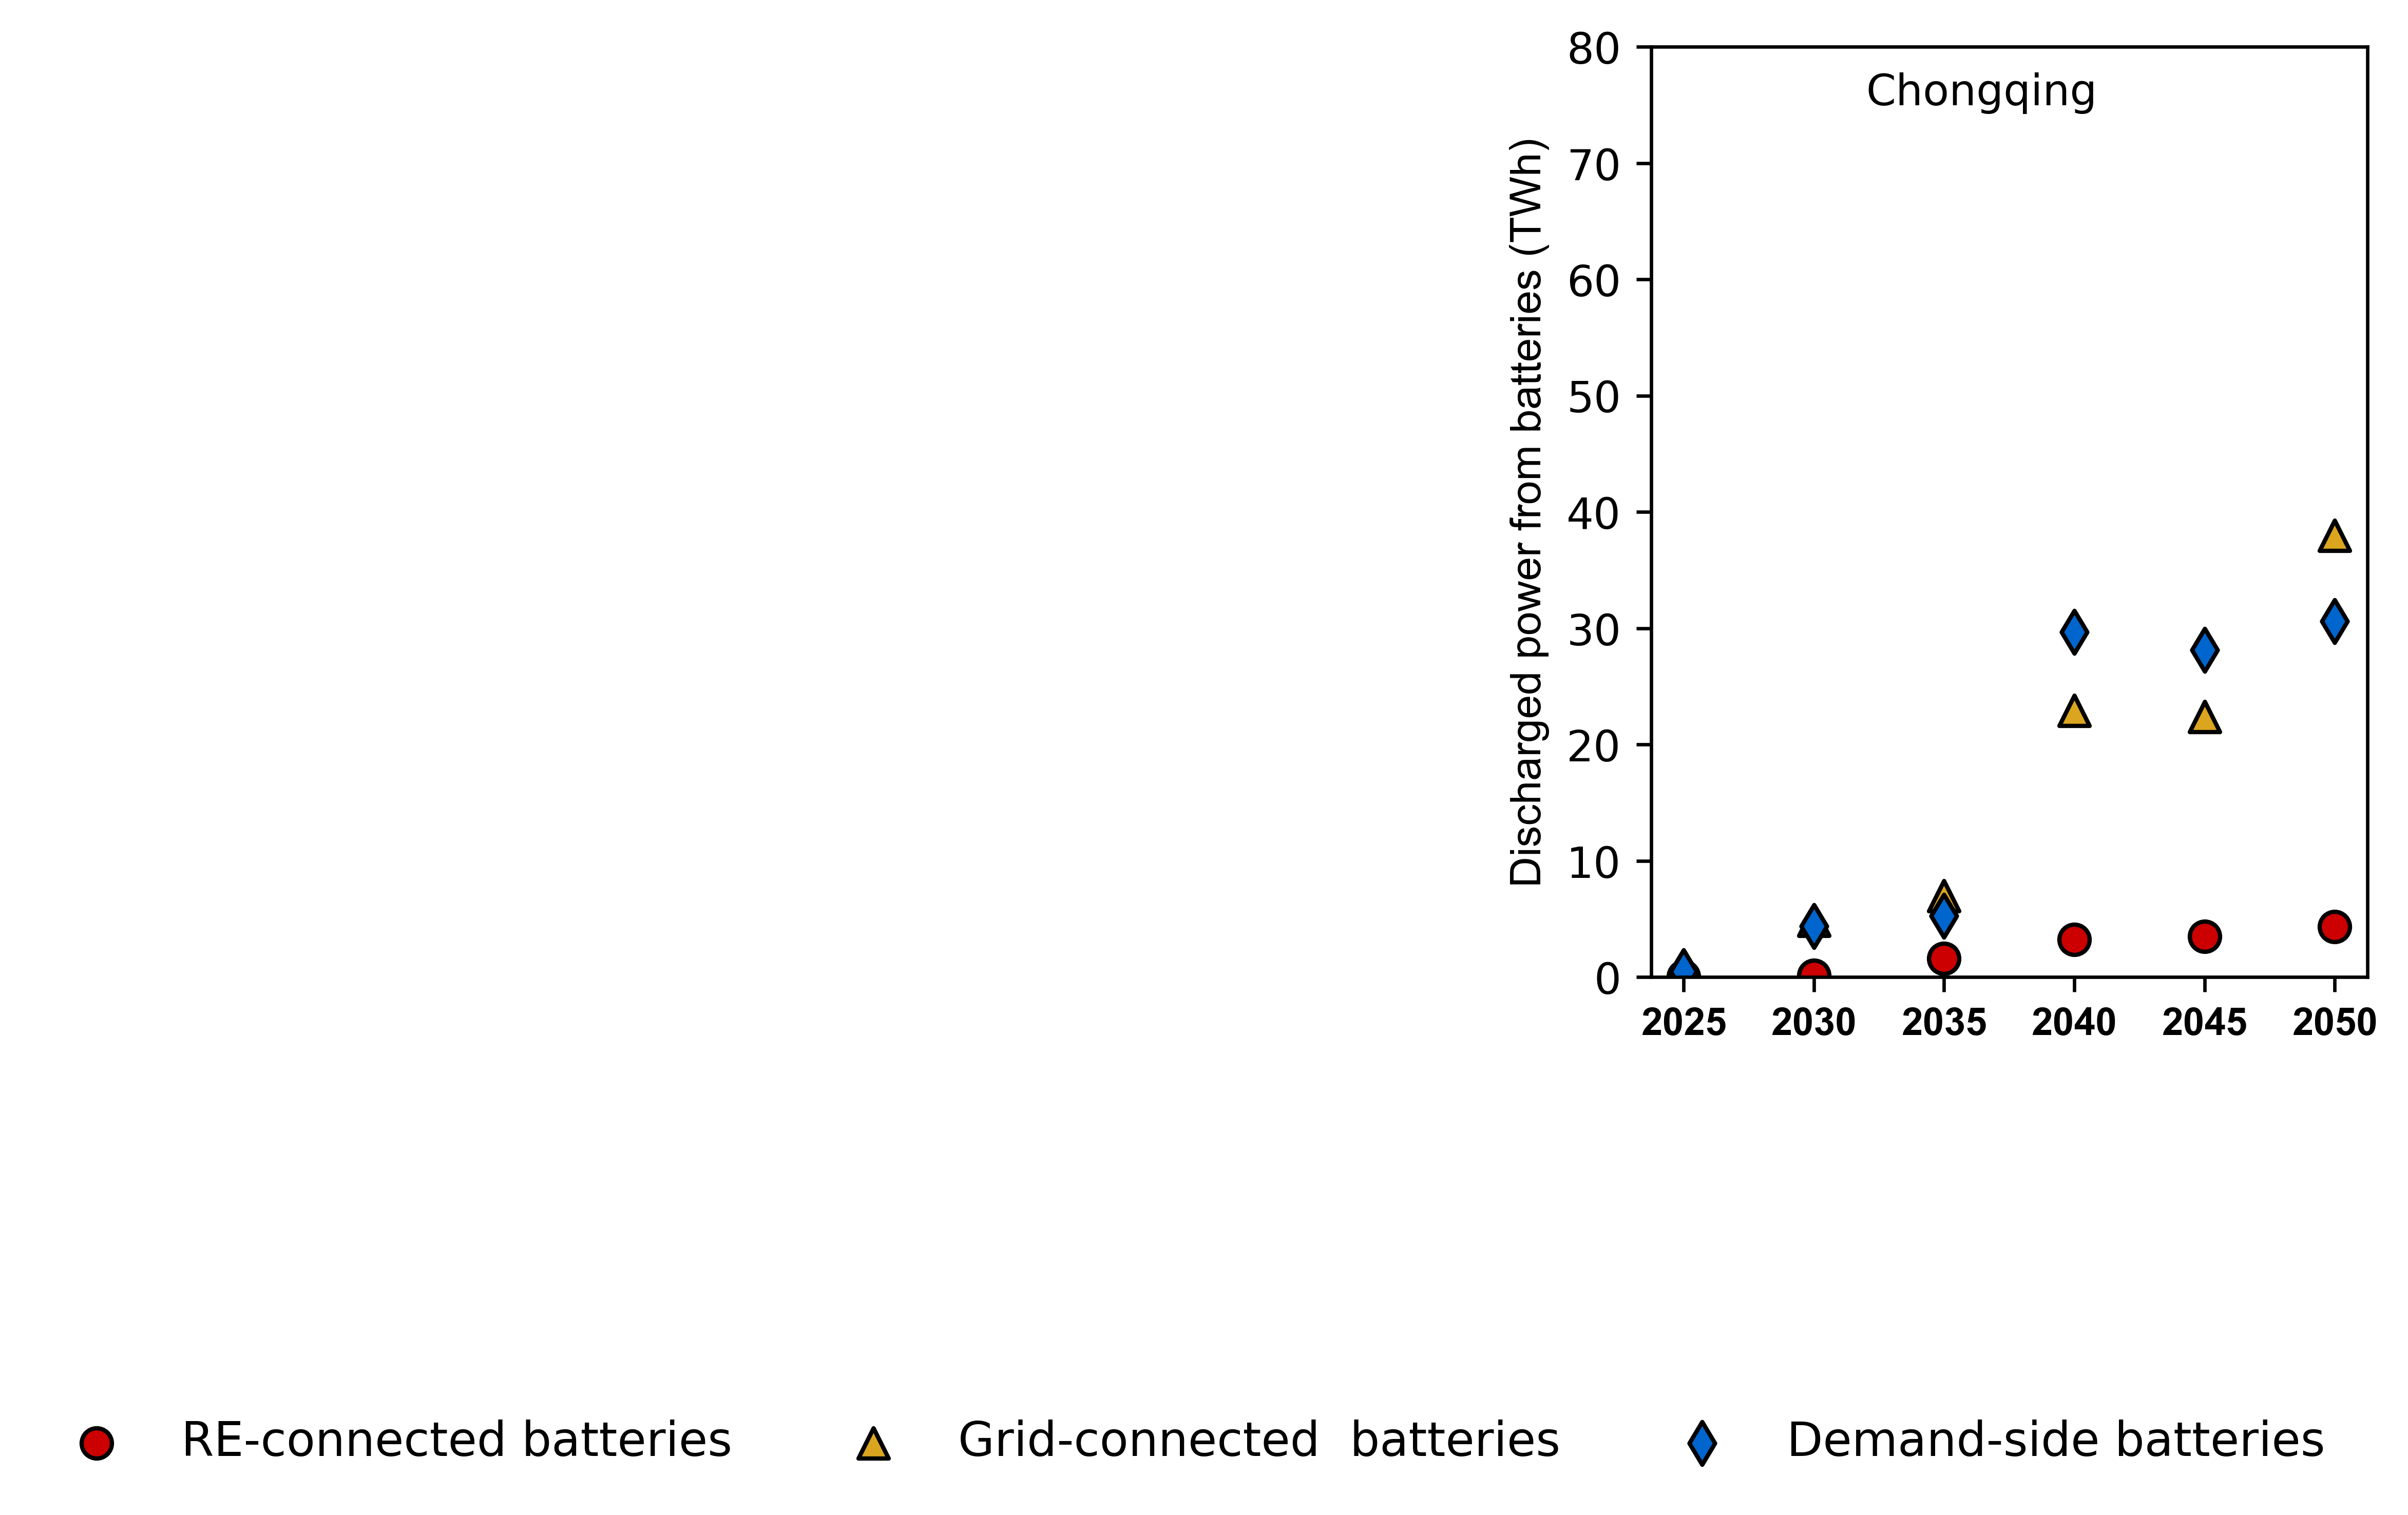

In [49]:
cat = "RE_rapid"
province_RE = filled_power[cat]

cat = "Ind_rapid"
province_Ind = filled_power[cat]
cat = "Demand_rapid"
province_Demand = filled_power[cat]

# p = "West_Inner_Mongolia"
p = "Chongqing"
province_RE = province_RE[p]  
province_Ind = province_Ind[p]
province_Demand = province_Demand[p]

fig = plt.figure(figsize=(3, 4), dpi=600)
r = range (6)
year = [2025,2030,2035,2040,2045,2050]
x= range (6)
y1 = province_RE
y2 = province_Ind
y3 = province_Demand

plt.scatter (x,y1, label = 'RE-connected batteries',  marker='o', s = 50, color='#cc0000',edgecolor='black')
plt.xticks(r, year, fontweight='bold',fontname = 'Arial', size =9)
plt.ylim(0,80)
plt.yticks(fontsize=10,color = 'black')
plt.ylabel('Discharged power from batteries (TWh)', size = 10, fontname = 'Arial') 
# plt.ylabel('Coal-fired power generation (TWh)', size = 10, fontname = 'Arial') 
plt.scatter (x,y2, label = 'Grid-connected  batteries', marker='^', s = 50, color='#dba51f',edgecolor='black')
plt.scatter (x,y3, label = 'Demand-side batteries', marker = 'd', s = 50, color='#0065cc',edgecolor='black')

# plt.text(0.8, 75, 'western Inner Mongolia', fontsize=10)
plt.text(1.4, 75, 'Chongqing', fontsize=10)

# plt.legend (frameon=False, bbox_to_anchor=(1, -0.5),loc = 'right', ncol=3,prop={'size': 11}) 

